In [1]:
import pandas as pd
# STEP 1 TO LOAD AND CLEAN THE DATASET
# Load each CSV file into a separate DataFrame
df_country_wise_latest = pd.read_csv("country_wise_latest.csv")
df_covid_19_clean_complete = pd.read_csv("covid_19_clean_complete.csv")
df_day_wise = pd.read_csv("day_wise.csv")
df_full_grouped = pd.read_csv("full_grouped.csv")
df_usa_county_wise = pd.read_csv("usa_county_wise.csv")
df_worldometer_data = pd.read_csv("worldometer_data.csv")

# Print confirmation and preview of the data
print("DataFrames loaded successfully!")
print("\nPreview of df_country_wise_latest:")
print(df_country_wise_latest.head())
print("\nPreview of df_covid_19_clean_complete:")
print(df_covid_19_clean_complete.head())
print("\nPreview of df_day_wise:")
print(df_day_wise.head())
print("\nPreview of df_full_grouped:")
print(df_full_grouped.head())
print("\nPreview of df_usa_county_wise:")
print(df_usa_county_wise.head())
print("\nPreview of df_worldometer_data:")
print(df_worldometer_data.head())

DataFrames loaded successfully!

Preview of df_country_wise_latest:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0

In [3]:
# Addressing missing values in the 'country_wise_latest' data

# Check missing values
print("Missing values before cleaning:")
print(df_country_wise_latest.isnull().sum())

Missing values before cleaning:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [5]:
# Addressing missing values in the 'covid_19_clean_complete' data

# Checking for missing values
print("Missing values before cleaning:")
print(df_covid_19_clean_complete.isnull().sum())

Missing values before cleaning:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [7]:
# I do not need the Province/State column, so I will drop the column entirely
df_covid_19_clean_complete = df_covid_19_clean_complete.drop(columns=['Province/State'])

In [9]:
# Re-checking for missing values
print("Missing values after cleaning:")
print(df_covid_19_clean_complete.isnull().sum())

Missing values after cleaning:
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [11]:
# Addressing missing values in the 'day_wise.csv' data

# Check missing values
print("Missing values before cleaning:")
print(df_day_wise.isnull().sum())

Missing values before cleaning:
Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64


In [13]:
# Addressing missing values in the 'full_grouped.csv' data

# Check missing values
print("Missing values before cleaning:")
print(df_full_grouped.isnull().sum())

Missing values before cleaning:
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64


In [15]:
# Addressing missing values in the 'usa_county_wise.csv' data

# Check missing values
print("Missing values before cleaning:")
print(df_usa_county_wise.isnull().sum())

Missing values before cleaning:
UID                  0
iso2                 0
iso3                 0
code3                0
FIPS              1880
Admin2            1128
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Combined_Key         0
Date                 0
Confirmed            0
Deaths               0
dtype: int64


In [29]:
# I won't need the FIPS and Admin2 information. So I am dropping them.
df_usa_county_wise = df_usa_county_wise.drop(['FIPS', 'Admin2'], axis=1)

In [31]:
# Re-Checking missing values
print("Missing values after cleaning:")
print(df_usa_county_wise.isnull().sum())

Missing values after cleaning:
UID               0
iso2              0
iso3              0
code3             0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64


In [19]:
# Addressing missing values in the 'worldometer_data.csv' data

# Check missing values
print("Missing values before cleaning:")
print(df_worldometer_data.isnull().sum())

Missing values before cleaning:
Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64


In [21]:
# I want to check the Continent, and Population Columns for the missing values so I can attempt filling them since they have very few missing rows
columns_to_check = ['Continent', 'Population']

In [23]:
# Filtering those rows where missing values occur in the specified columns
missing_rows = df_worldometer_data[df_worldometer_data[columns_to_check].isnull().any(axis=1)]

In [43]:
# Displaying those rows with missing values in the specified columns
print(missing_rows)

             Country/Region          Continent  Population  TotalCases  \
84            French Guiana      South America    299385.0        8127   
102                     CAR             Africa   4837752.0        4620   
112                 Mayotte             Africa    273419.0        3042   
156        Diamond Princess                NaN         NaN         712   
158                 Réunion             Africa    895952.0         671   
159         Channel Islands             Europe    174022.0         597   
167             Isle of Man             Europe     85078.0         336   
170              Guadeloupe      North America    400131.0         279   
171              Martinique      North America    375235.0         276   
172          Faeroe Islands             Europe     48882.0         266   
173                   Aruba      North America    106812.0         263   
176          Cayman Islands      North America     65798.0         203   
177               Gibraltar           

In [25]:
# Fill missing values
df_worldometer_data['Continent'] = df_worldometer_data['Continent'].fillna('North America')
df_worldometer_data.loc[df_worldometer_data['Population'].isnull(), 'Population'] = 3711

In [27]:
# I do not need the WHO Region column, so I will drop this column
df_worldometer_data = df_worldometer_data.drop(columns=['WHO Region'])

In [33]:
# Re-Checking missing values
print("Missing values after cleaning:")
print(df_worldometer_data.isnull().sum())

Missing values after cleaning:
Country/Region        0
Continent             0
Population            0
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
dtype: int64


In [35]:
# Since there were no records for the remaining missing values, I will assume that no cases were entered for those specific days. Therefore I will fill them with 0
df_worldometer_data = df_worldometer_data.fillna(0)

In [37]:
# Re-Checking again for missing values
print("Missing values after cleaning:")
print(df_worldometer_data.isnull().sum())

Missing values after cleaning:
Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64


In [39]:
# STEP 2: Exploratory Data Analysis (EDA)

# Understanding the Structure of the Dataset

# Displaying basic information about each DataFrame
print(df_country_wise_latest.info())
print(df_covid_19_clean_complete.info())
print(df_day_wise.info())
print(df_full_grouped.info())
print(df_usa_county_wise.info())
print(df_worldometer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [41]:
# Displaying the first few rows to understand the data content
print(df_country_wise_latest.head())
print(df_covid_19_clean_complete.head())
print(df_day_wise.head())
print(df_full_grouped.head())
print(df_usa_county_wise.head())
print(df_worldometer_data.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [43]:
# Next, I want to generate some general statistics to understand the distribution of numerical data

# For numerical columns, checking basic statistics like mean, median, std, etc.
print(df_country_wise_latest.describe())
print(df_covid_19_clean_complete.describe())
print(df_day_wise.describe())
print(df_full_grouped.describe())
print(df_usa_county_wise.describe())
print(df_worldometer_data.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

In [45]:
# I want to make use of boxplots for visualizations to identify outliers in my numerical columns.

import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df):
    numerical_columns = df.select_dtypes(include='number').columns
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

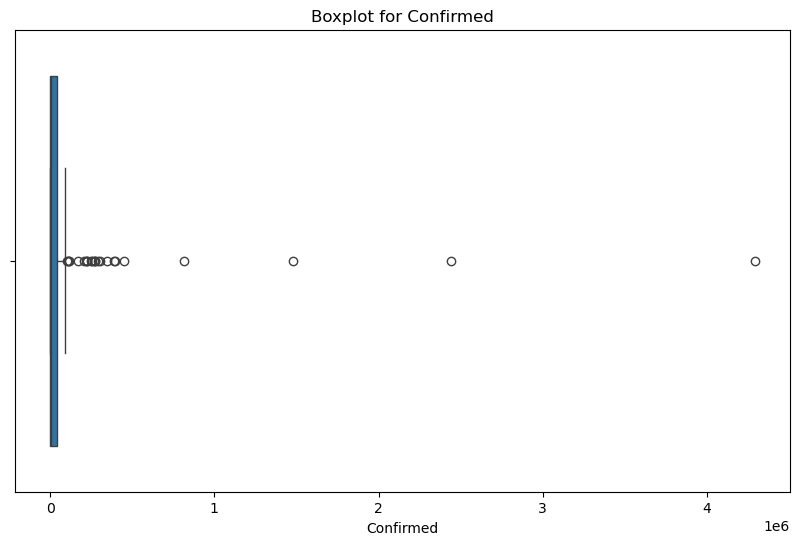

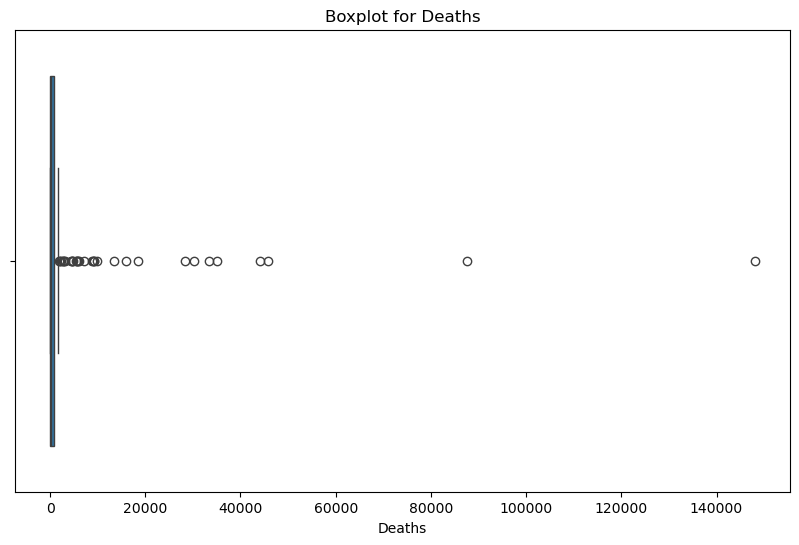

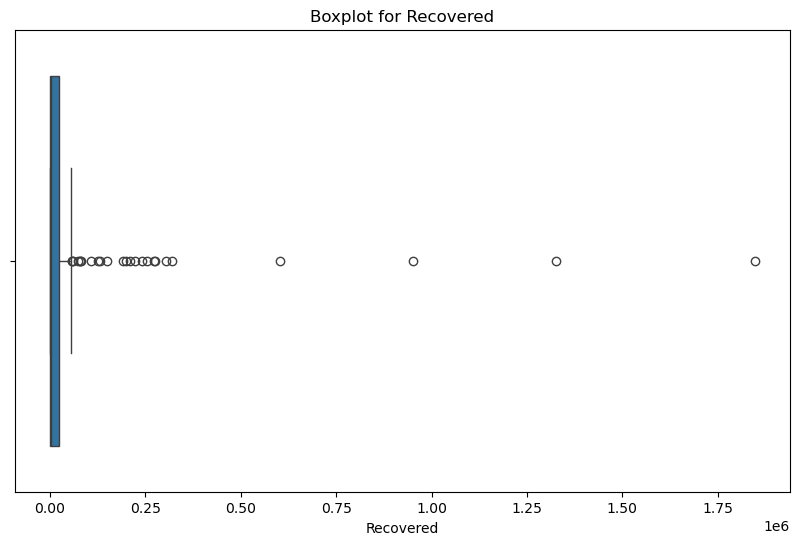

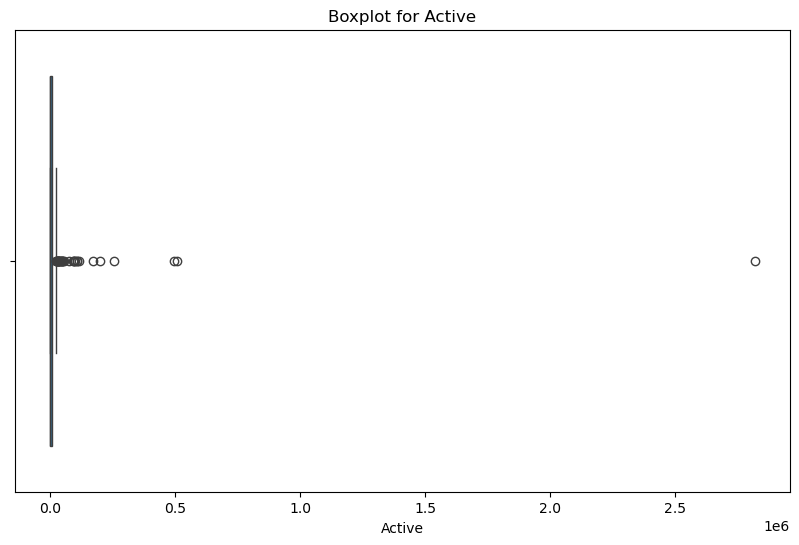

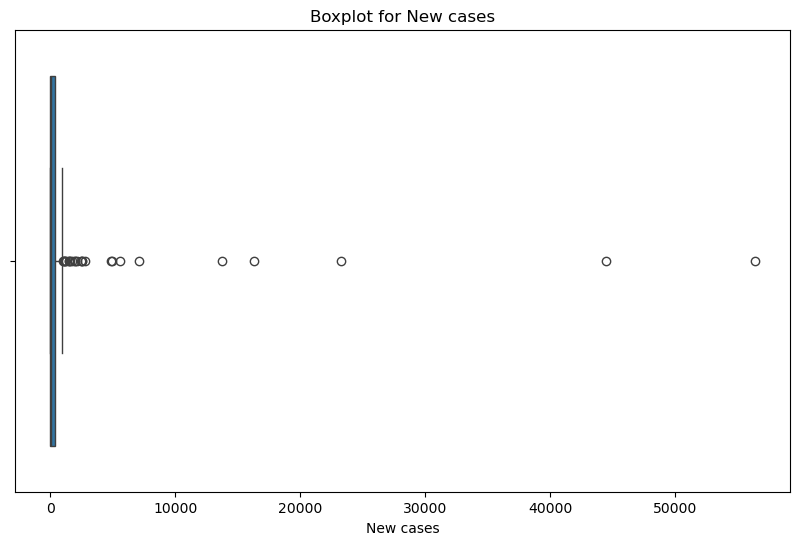

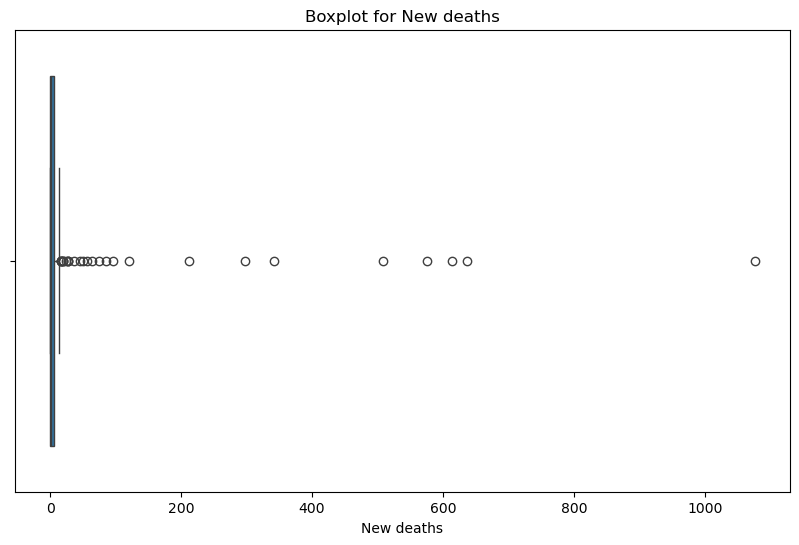

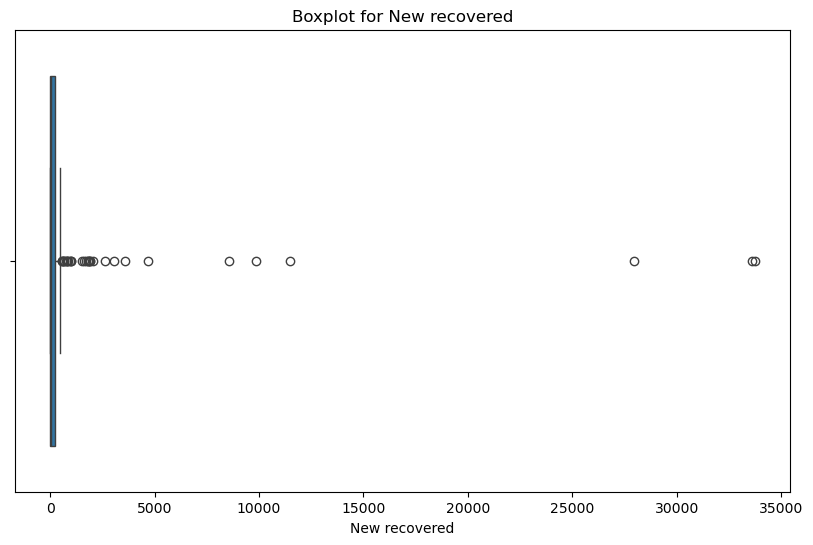

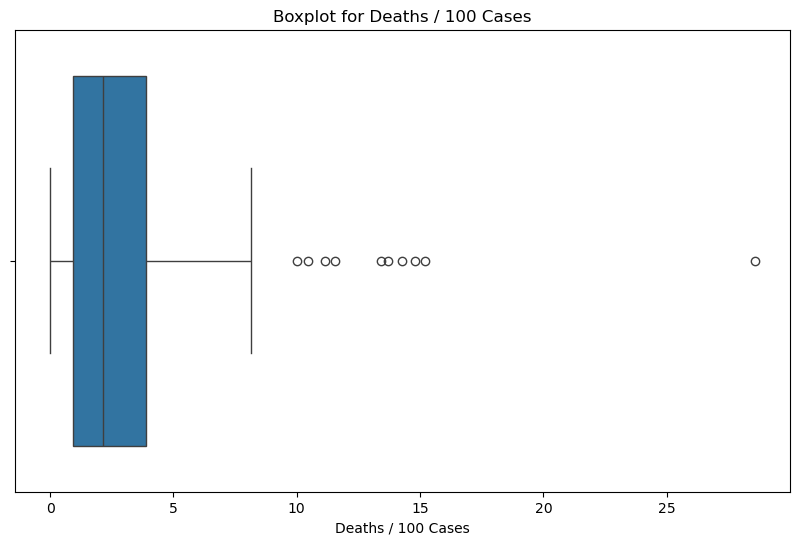

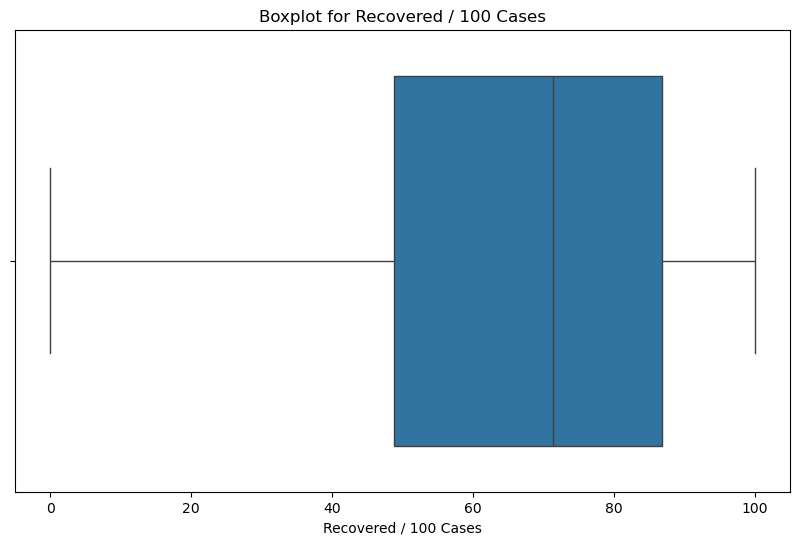

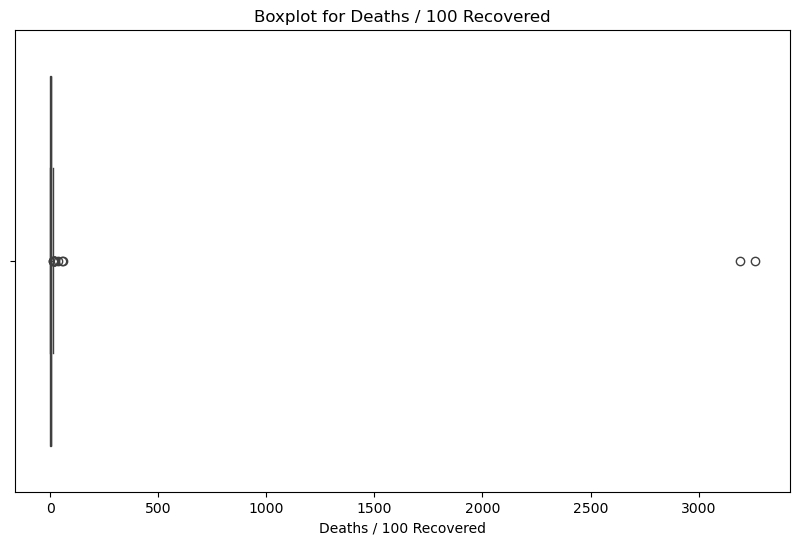

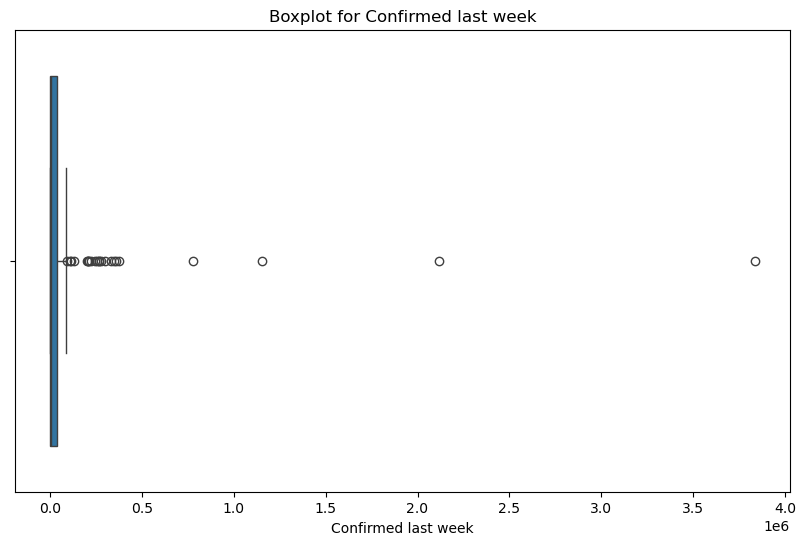

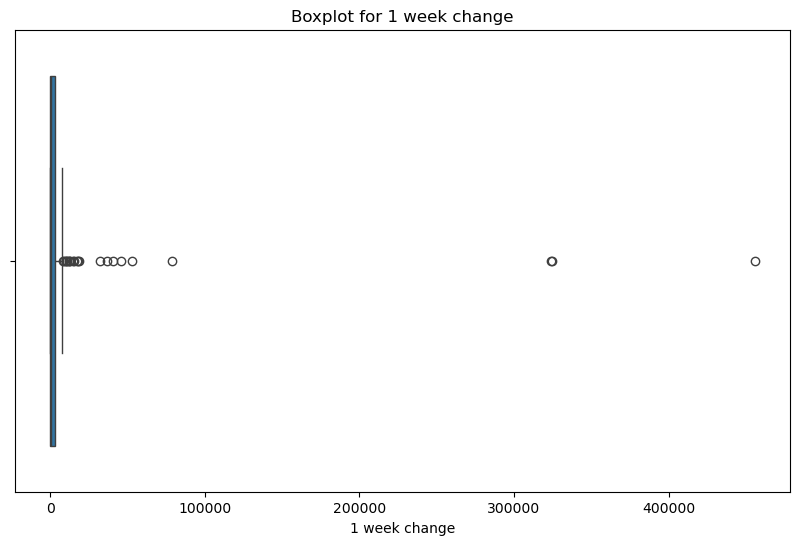

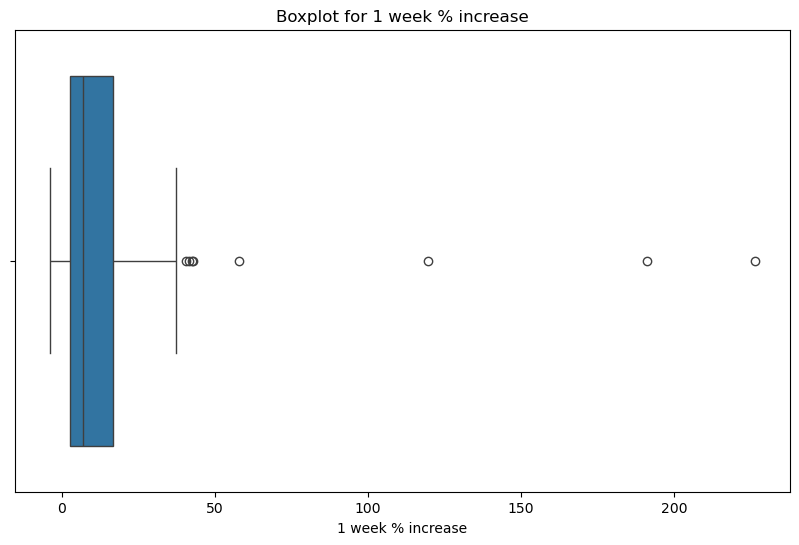

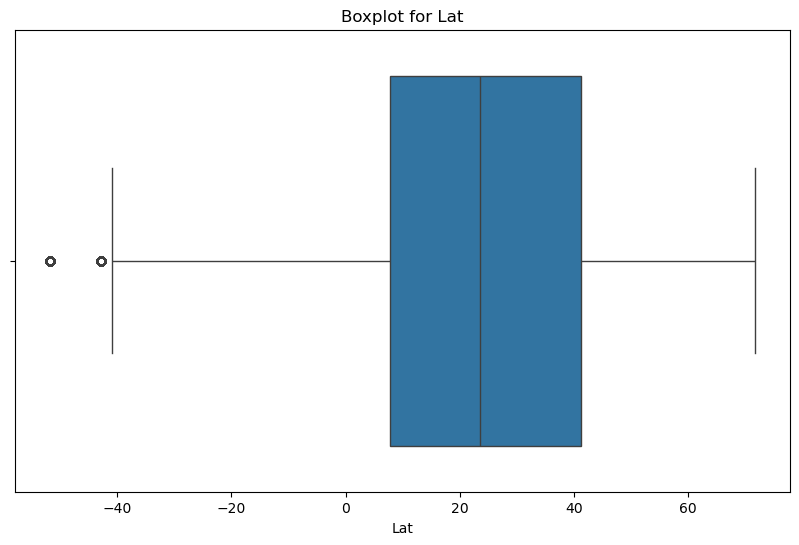

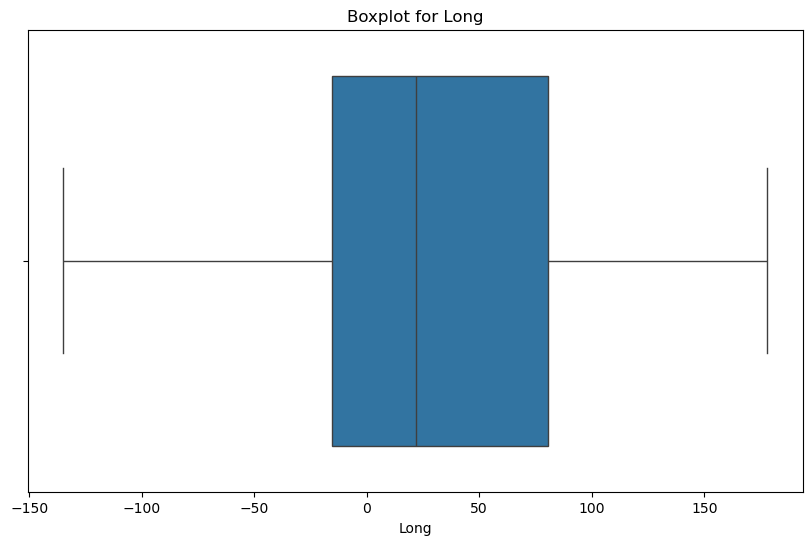

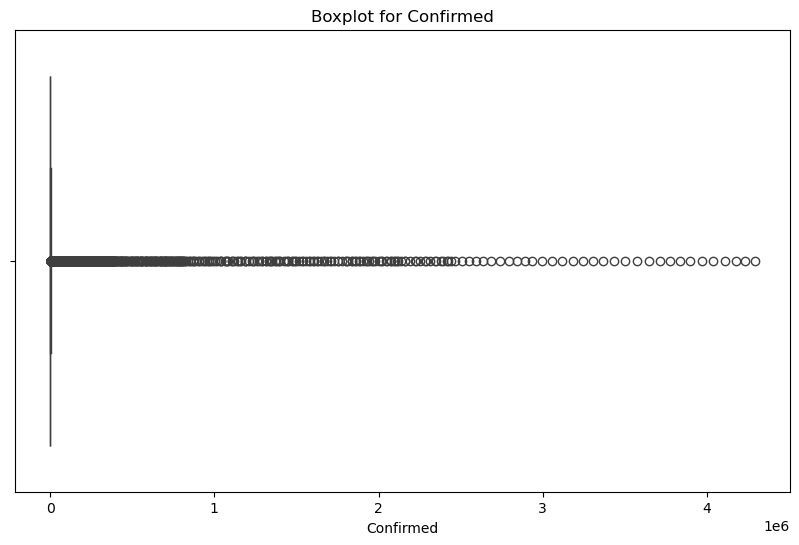

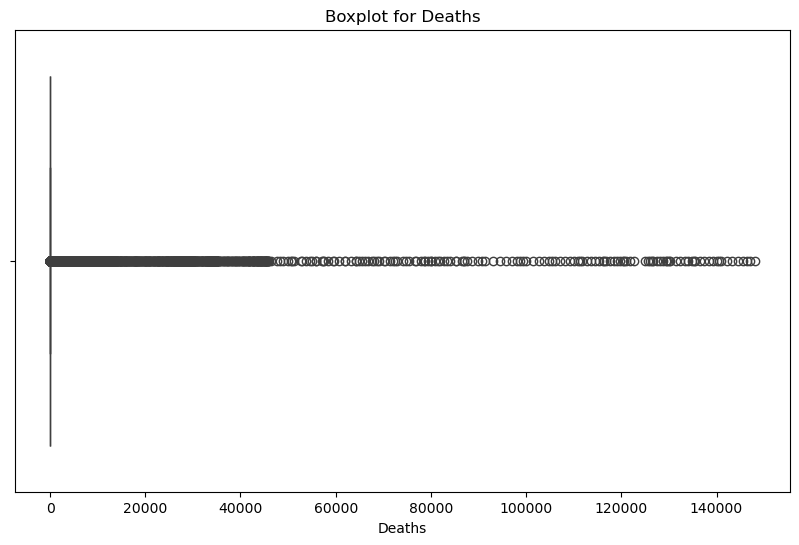

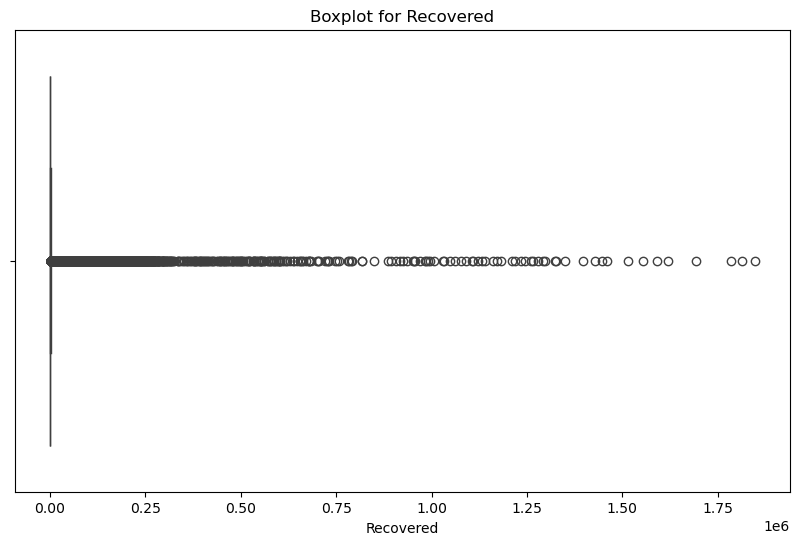

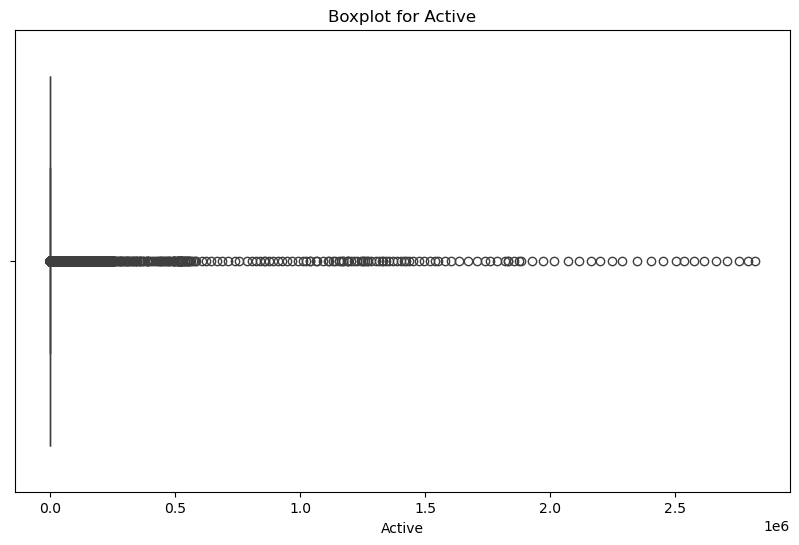

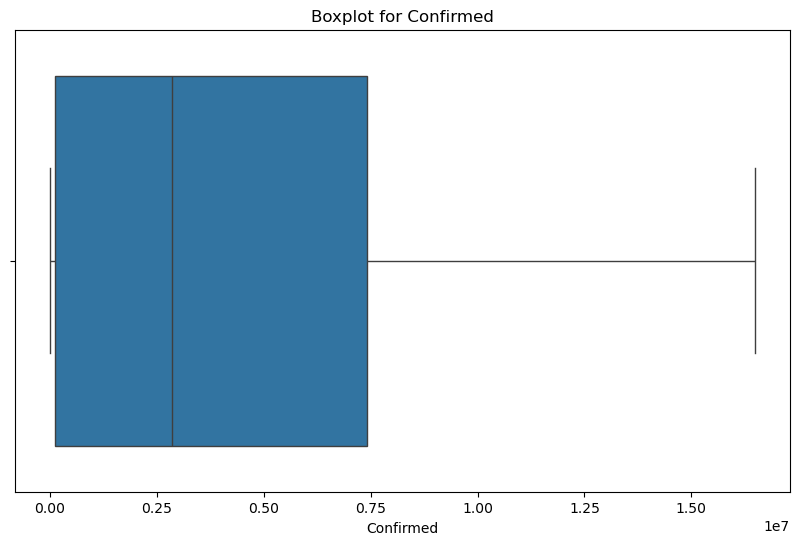

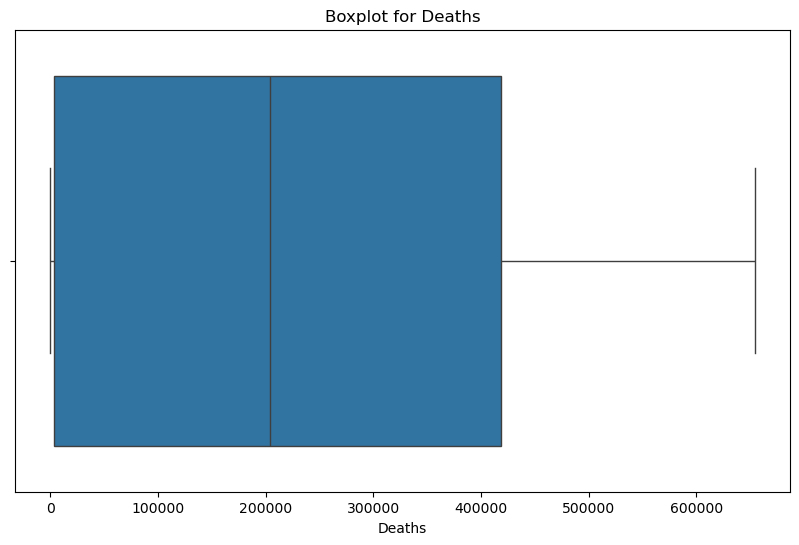

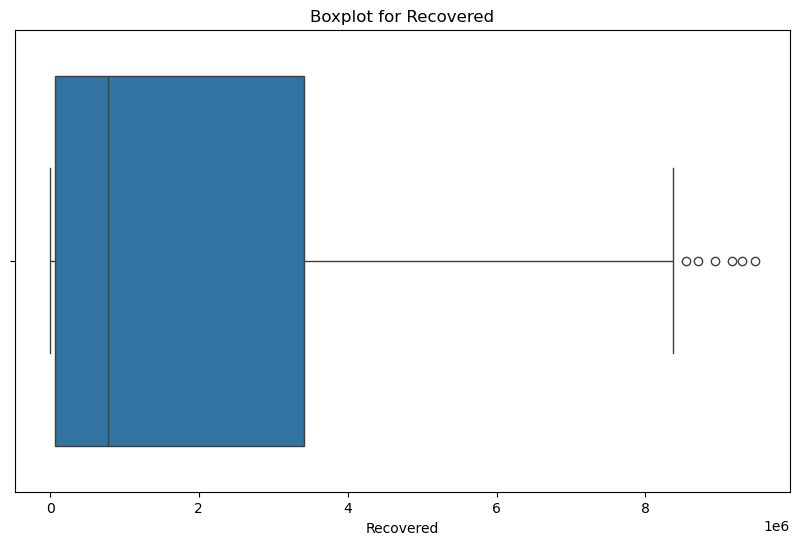

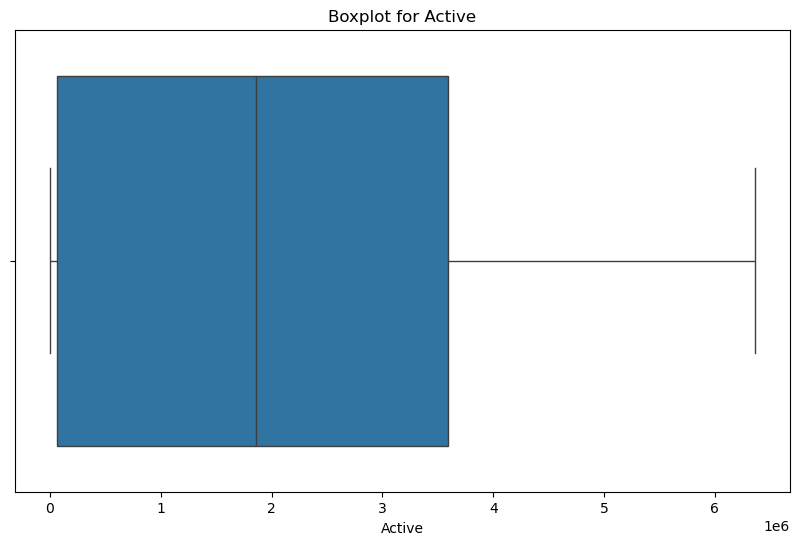

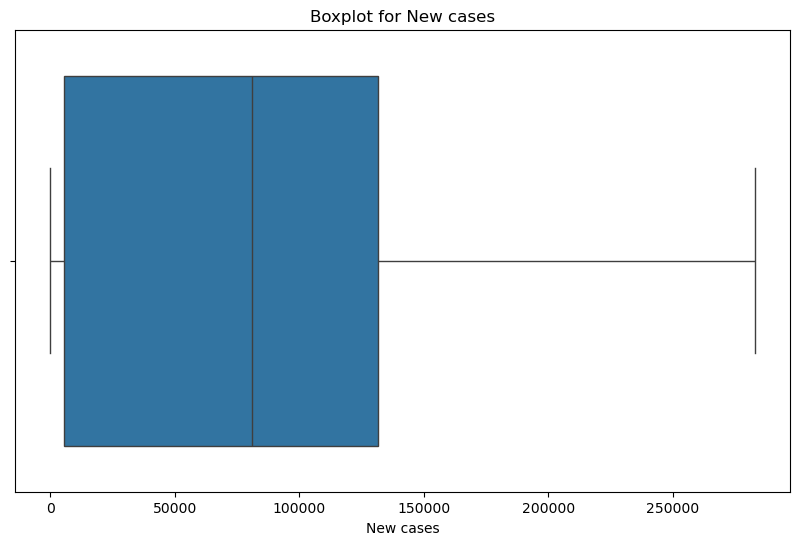

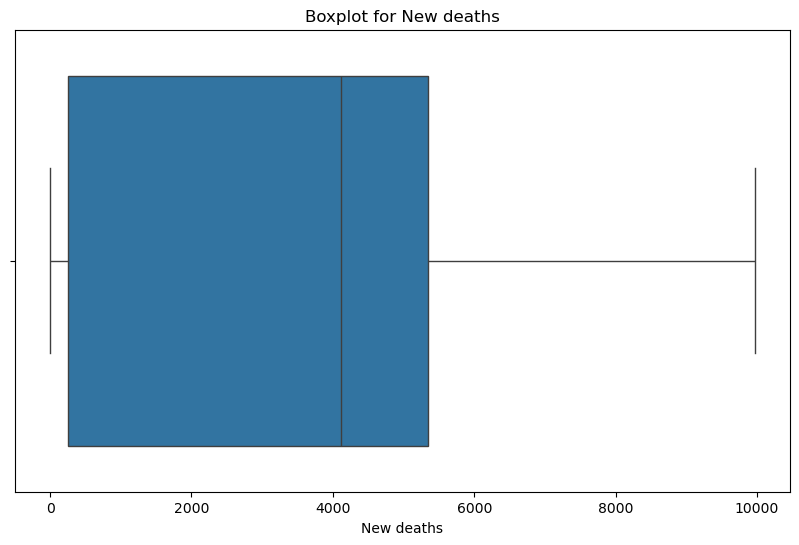

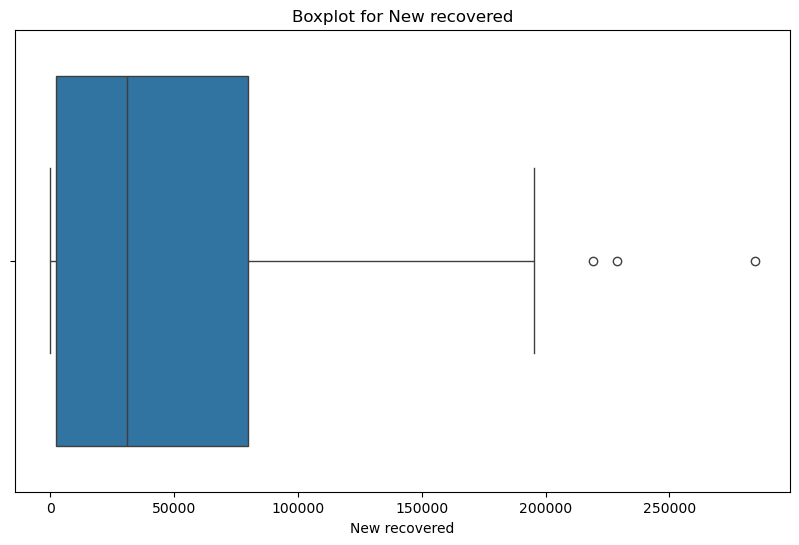

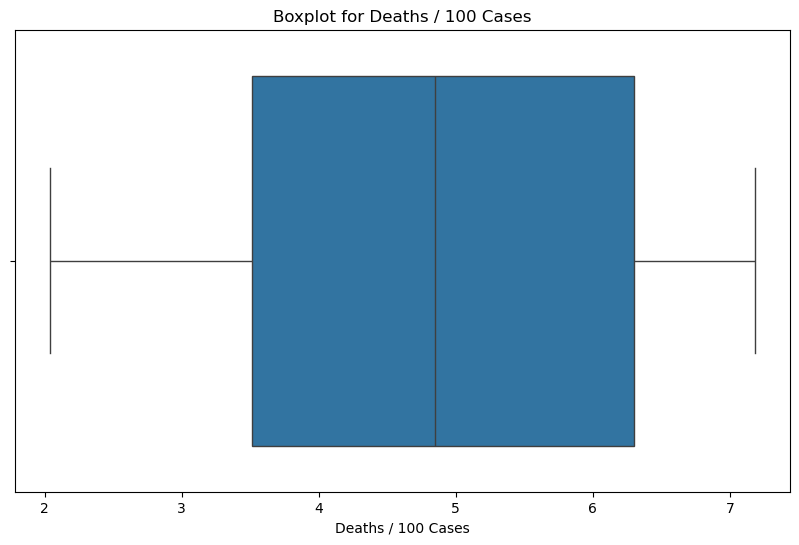

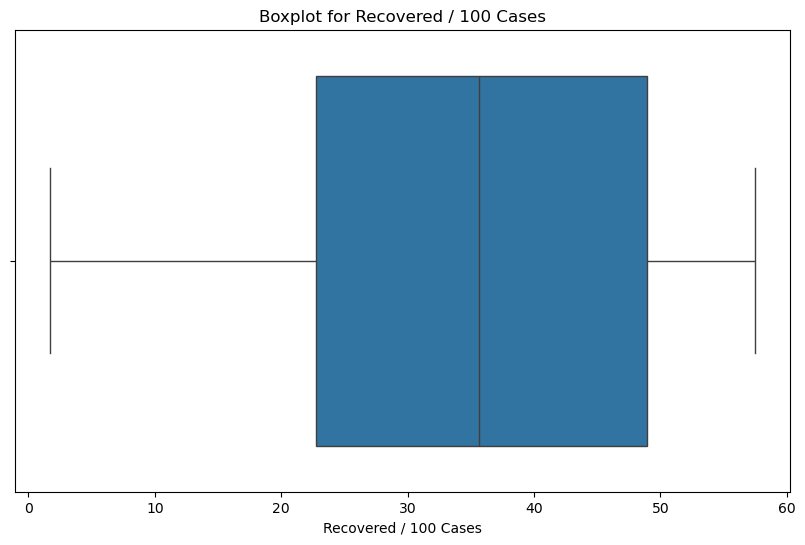

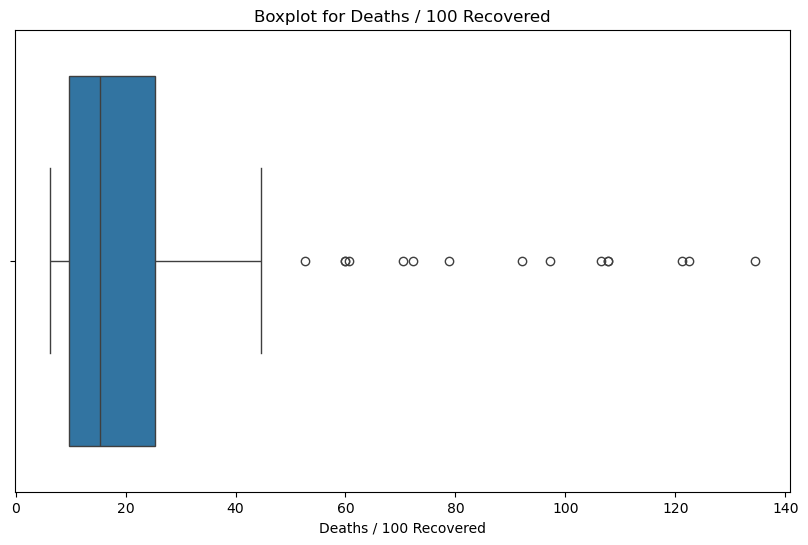

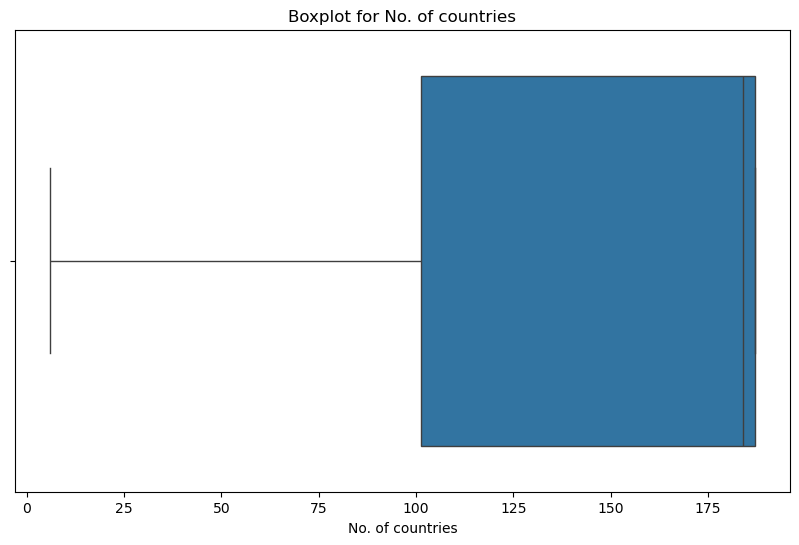

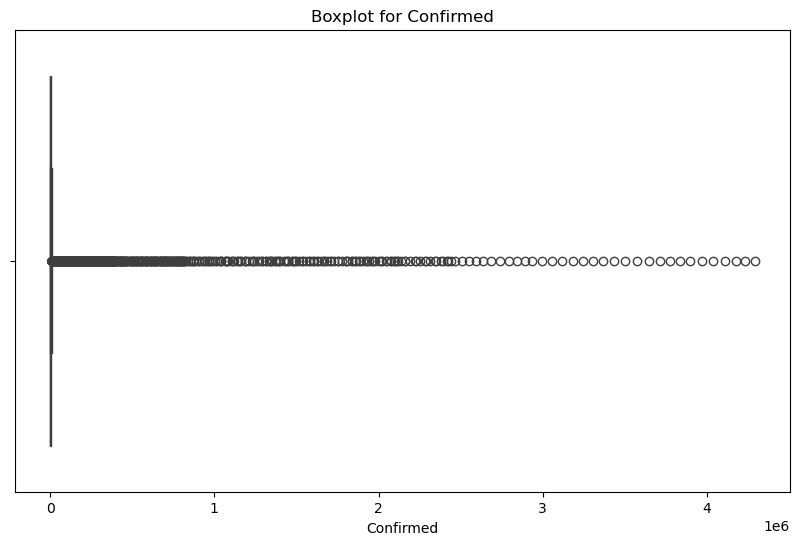

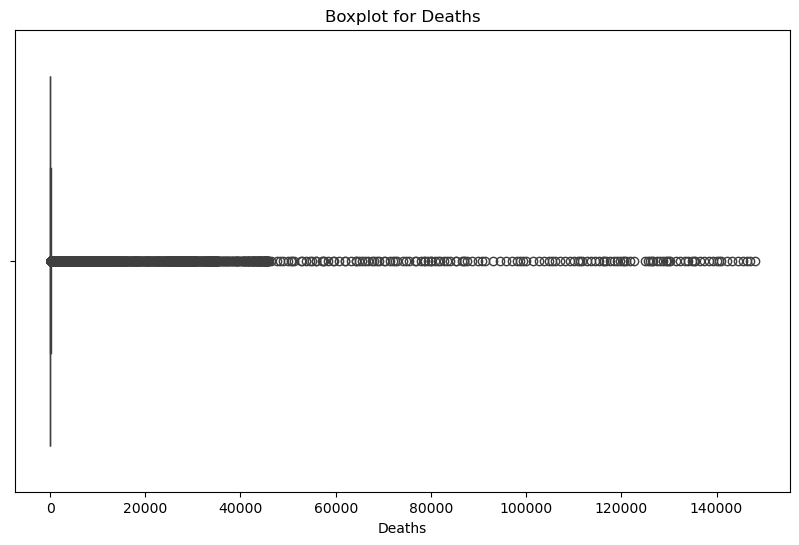

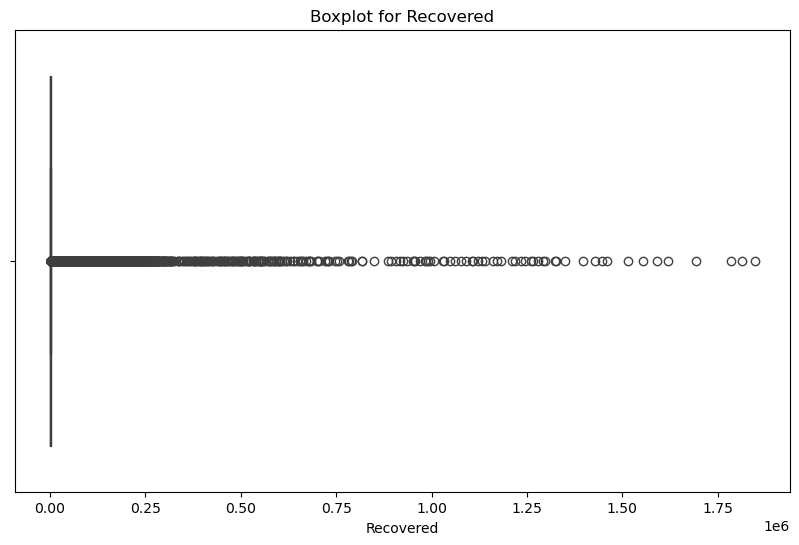

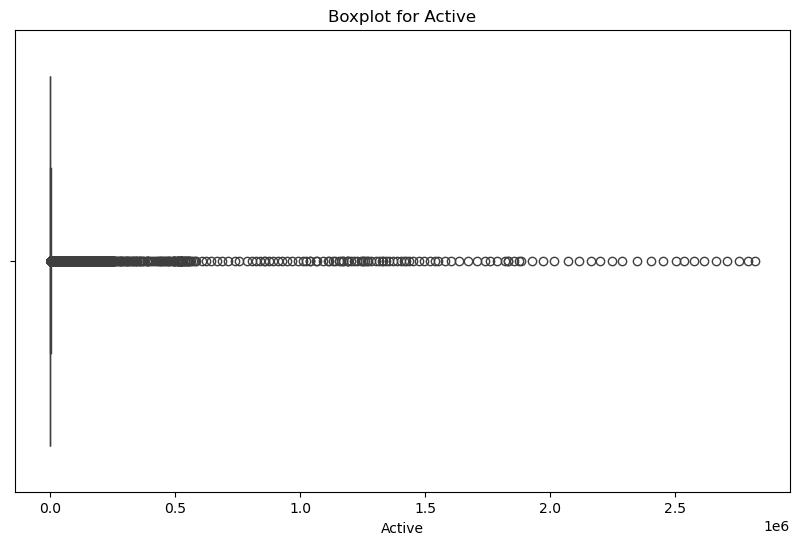

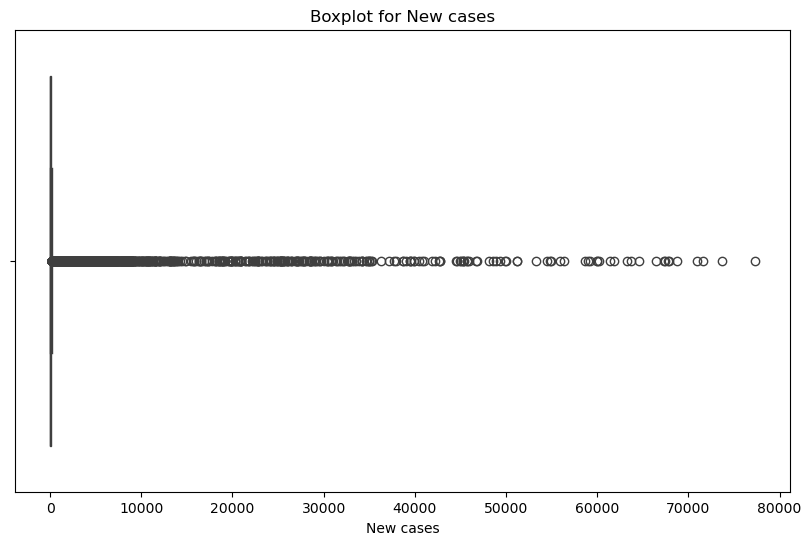

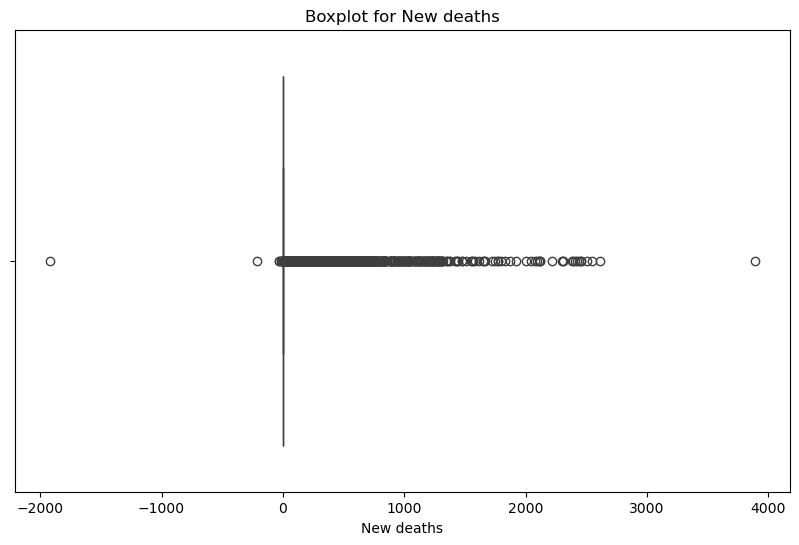

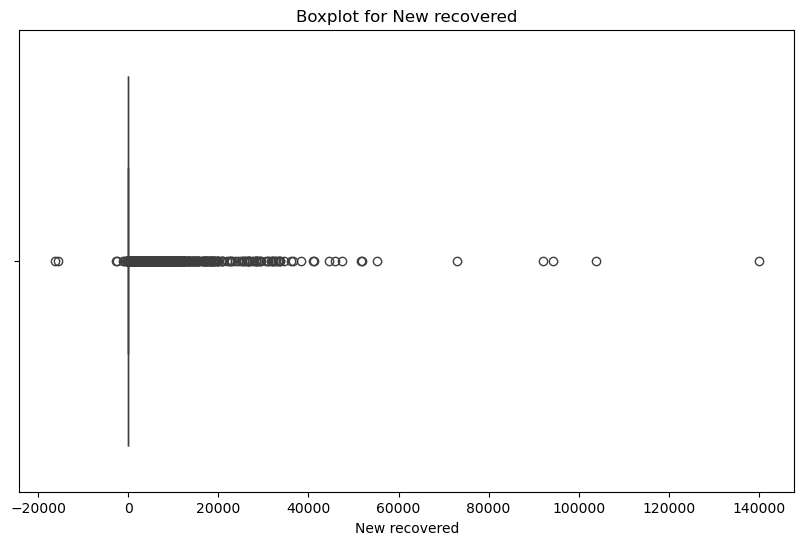

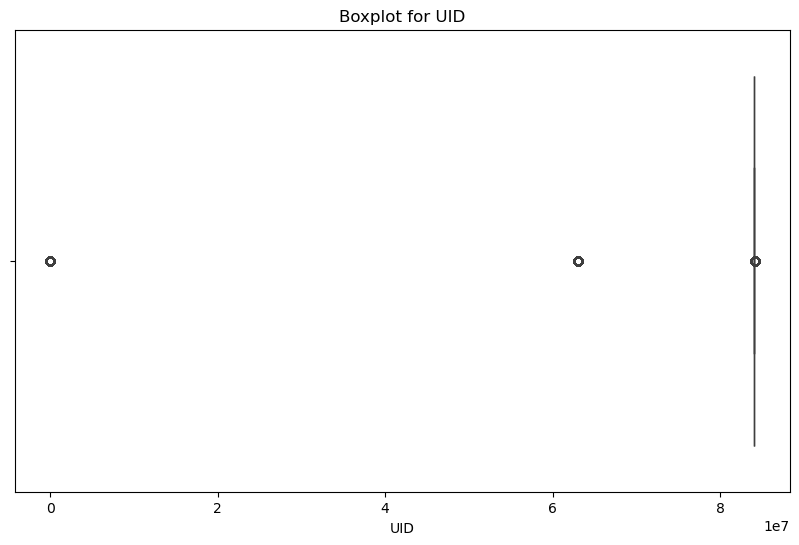

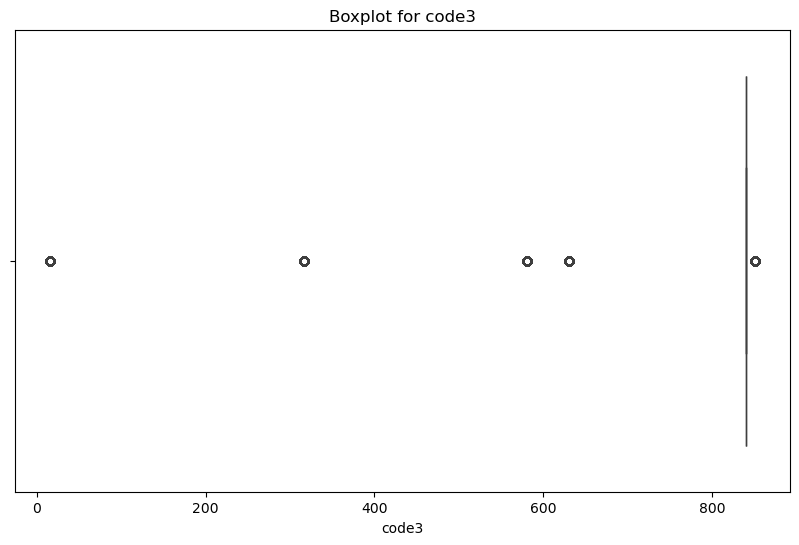

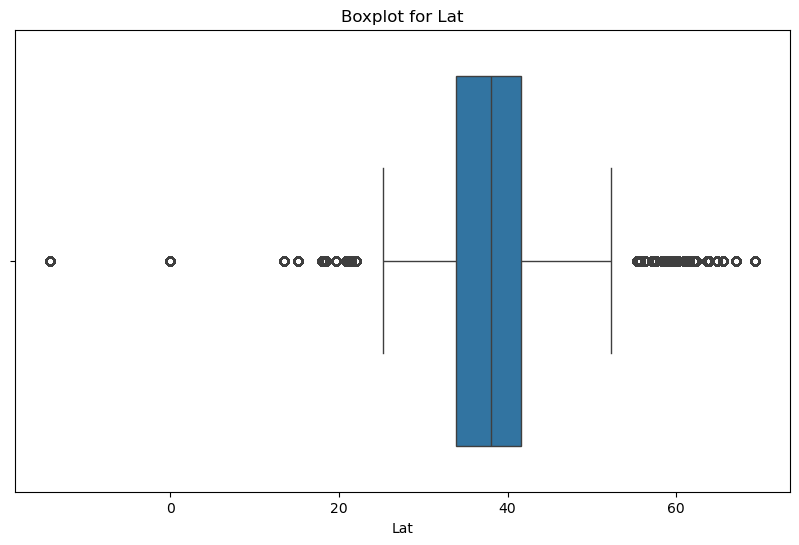

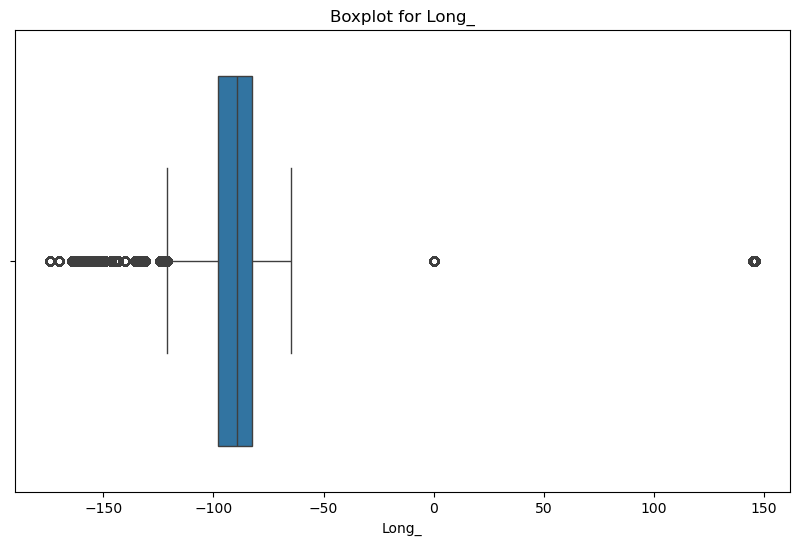

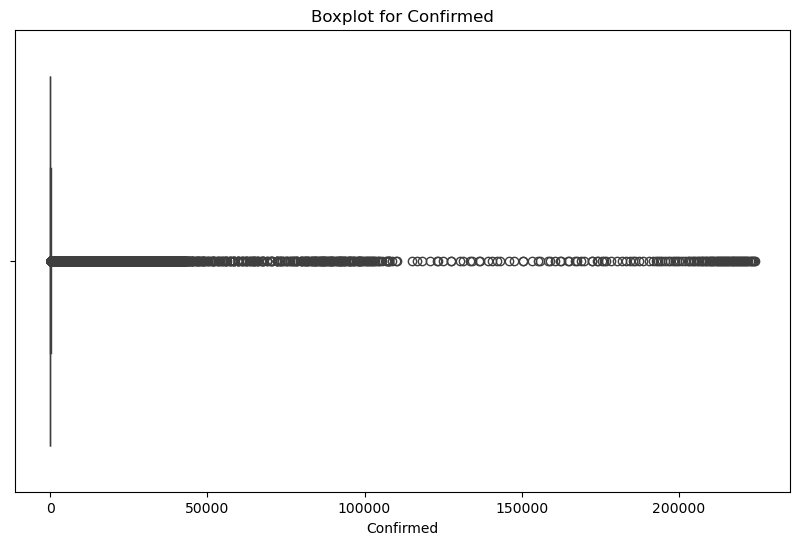

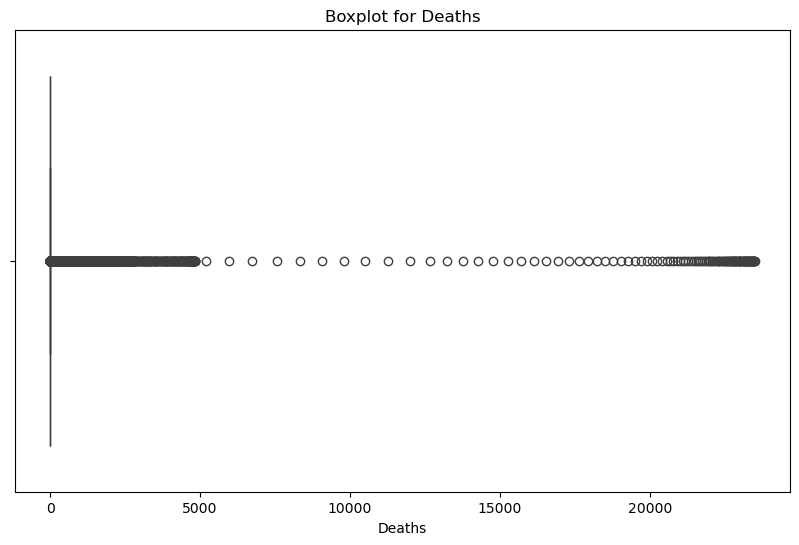

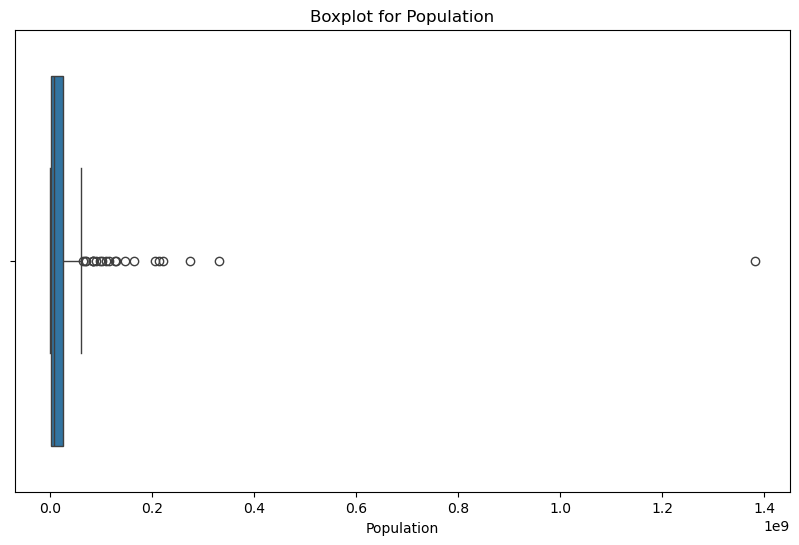

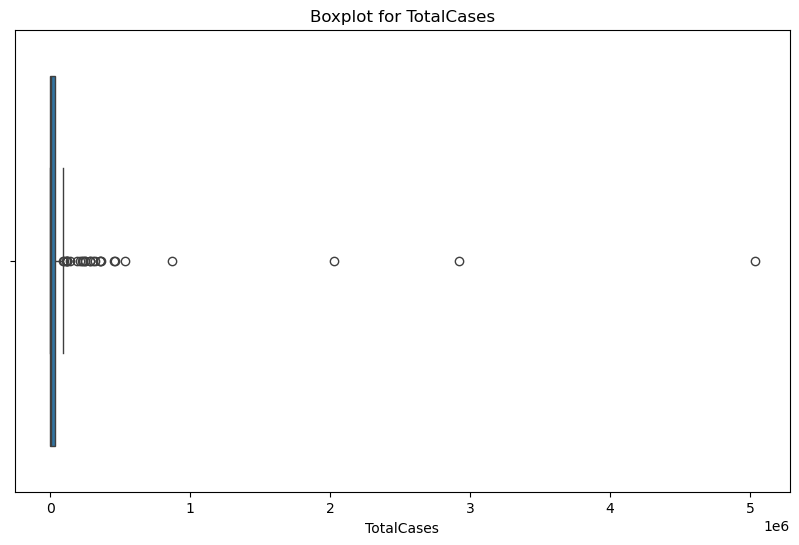

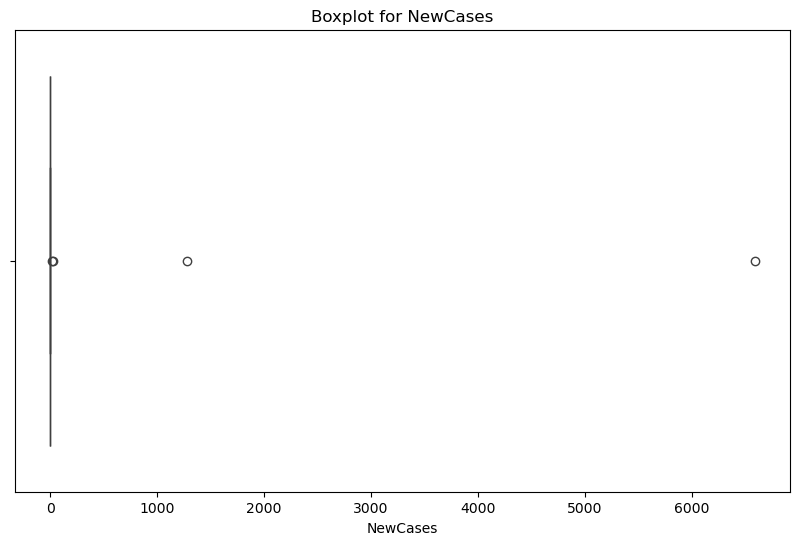

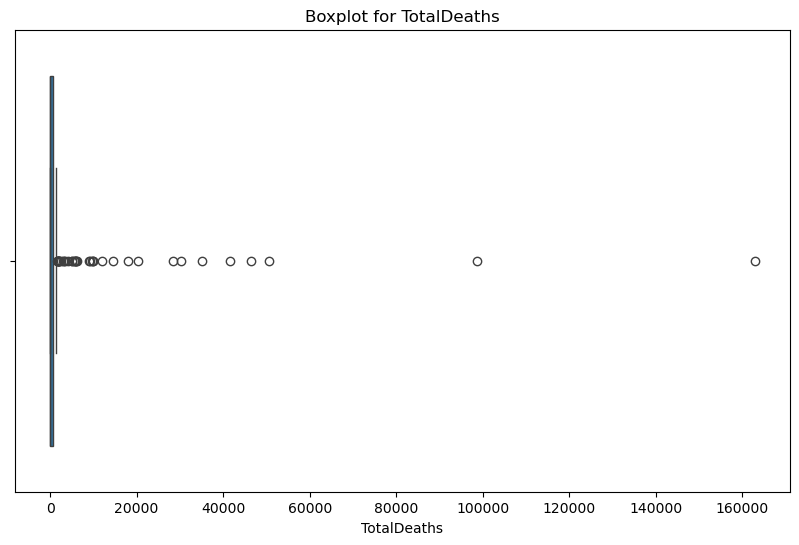

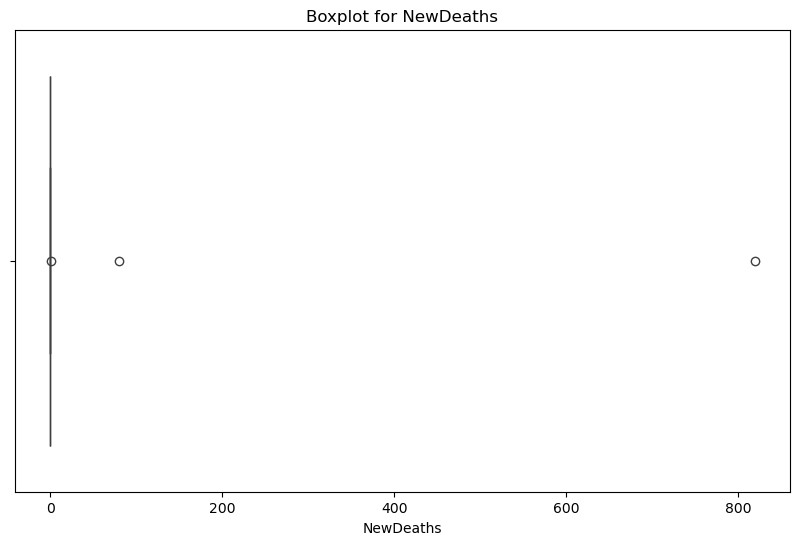

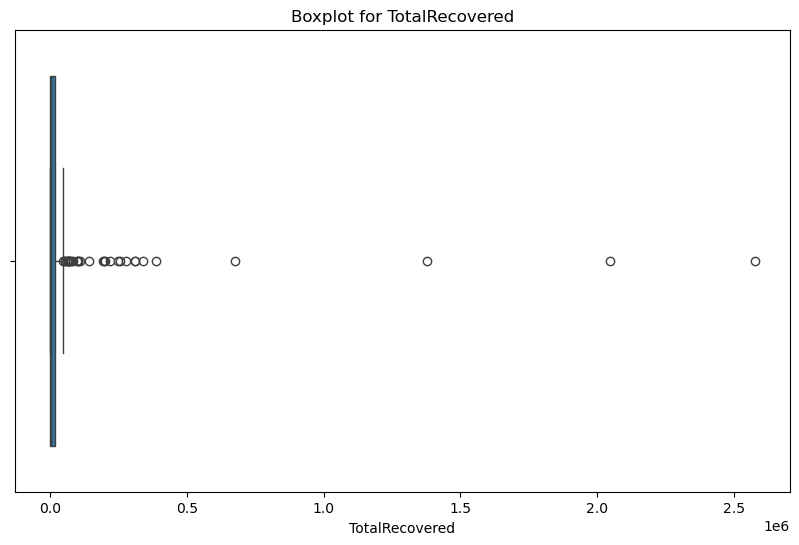

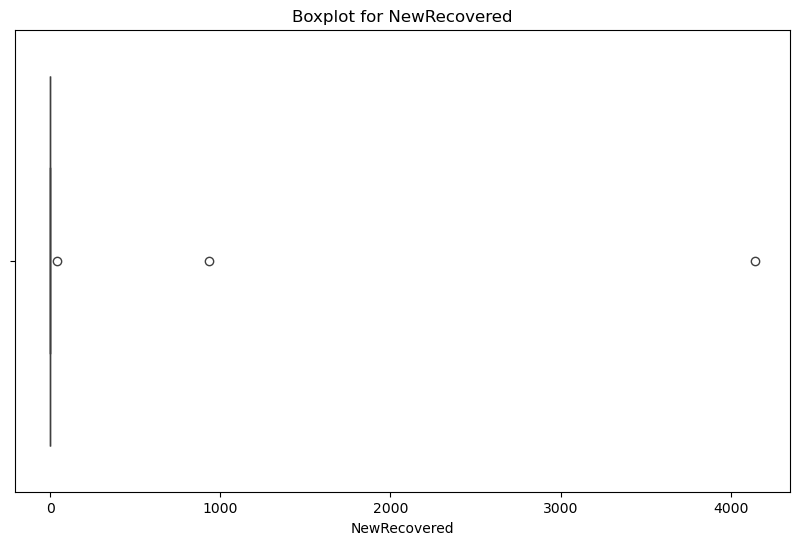

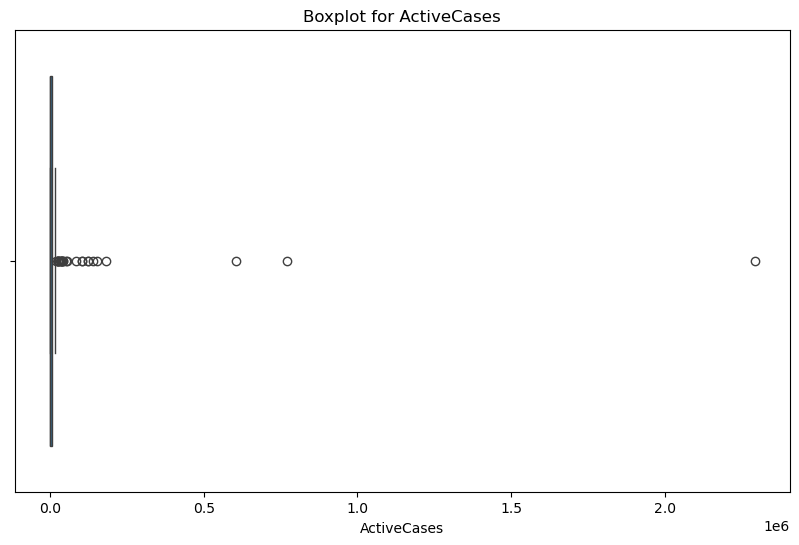

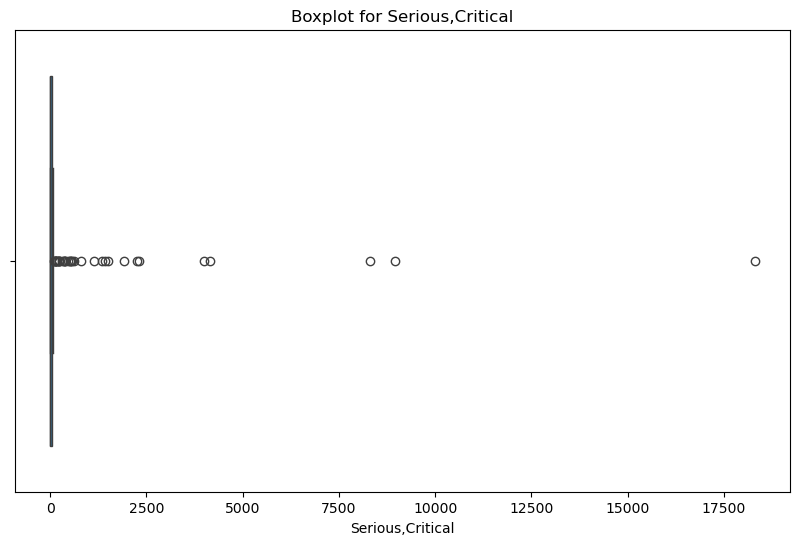

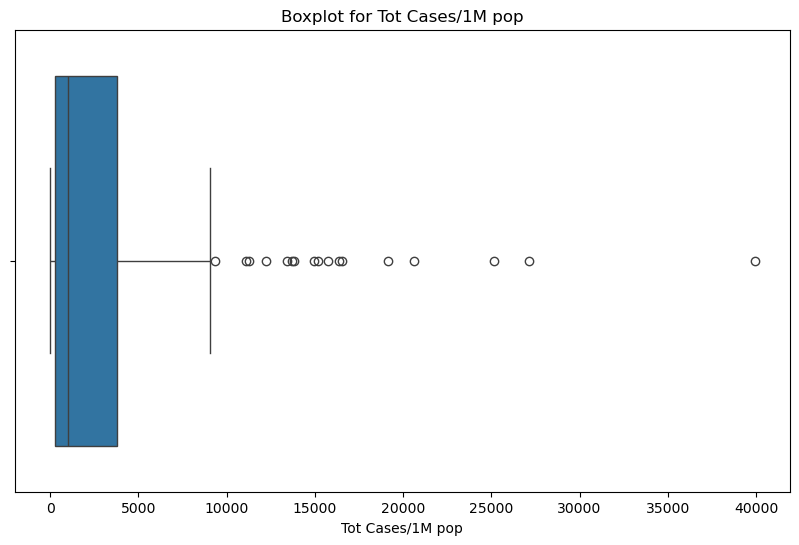

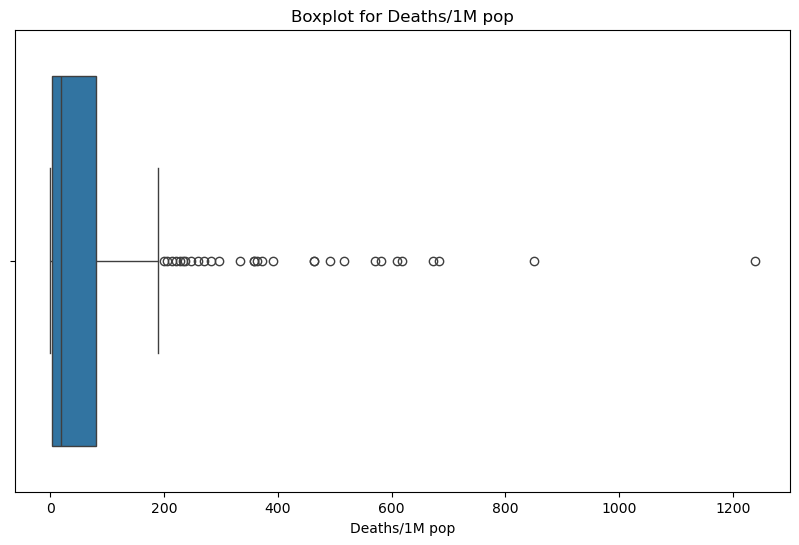

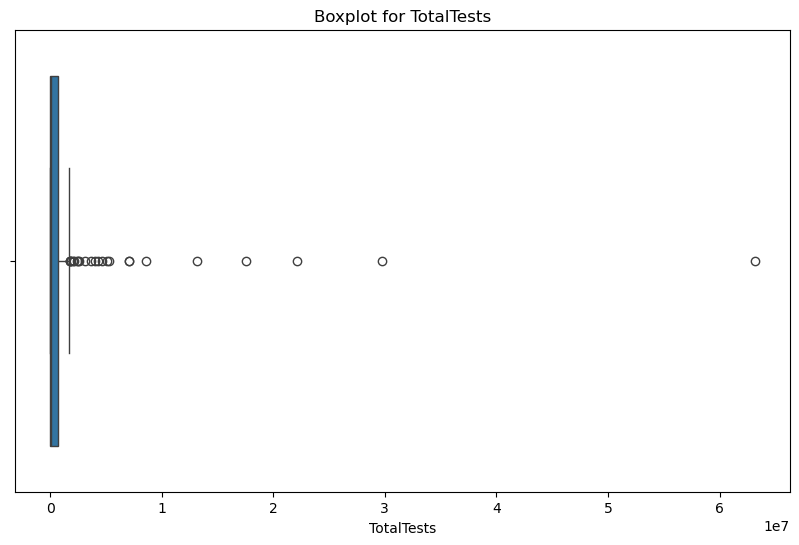

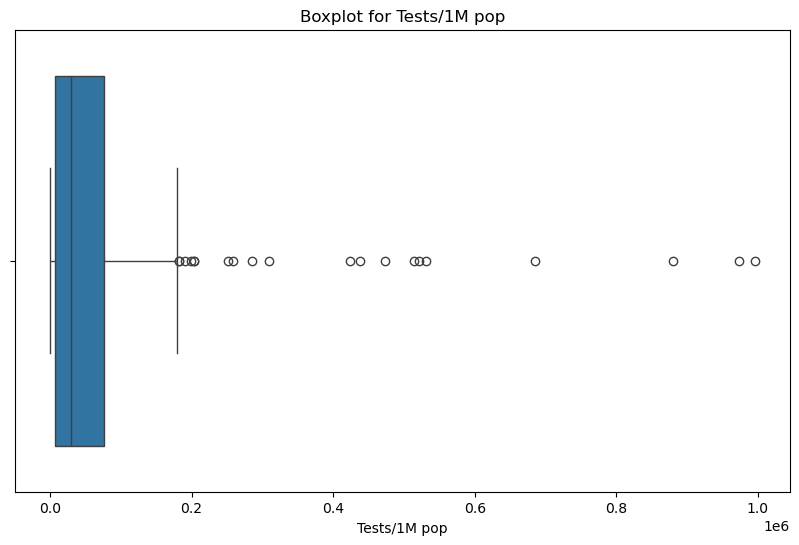

In [47]:
# Calling the function for each DataFrame
plot_boxplots(df_country_wise_latest)
plot_boxplots(df_covid_19_clean_complete)
plot_boxplots(df_day_wise)
plot_boxplots(df_full_grouped)
plot_boxplots(df_usa_county_wise)
plot_boxplots(df_worldometer_data)

In [51]:
# To get the daily growth rate using the df_country_wise_latest Dataframe, while putting into consideration the rows that have zero values,
df_country_wise_latest['daily_growth_rate'] = df_country_wise_latest['1 week change'].fillna(0) / 7
df_country_wise_latest['daily_growth_rate_percentage'] = df_country_wise_latest['1 week % increase'].fillna(0) / 7

In [57]:
# Check the result for the first few rows
df_country_wise_latest[['1 week change', '1 week % increase', 'daily_growth_rate', 'daily_growth_rate_percentage']].head()

,1 week change,1 week % increase,daily_growth_rate,daily_growth_rate_percentage
0,737,2.07,105.285714,0.295714
1,709,17.00,101.285714,2.428571
2,4282,18.07,611.714286,2.581429
3,23,2.60,3.285714,0.371429
4,201,26.84,28.714286,3.834286


In [61]:
# To get the mortality rate in the df_country_wise_latest Dataframe, while putting into consideration the rows that have zero values,

df_country_wise_latest[['Deaths / 100 Cases', 'Deaths / 100 Recovered']].head()

,Deaths / 100 Cases,Deaths / 100 Recovered
0,3.50,5.04
1,2.95,5.25
2,4.16,6.17
3,5.73,6.48
4,4.32,16.94


C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_13896\850035032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='Blues_d')


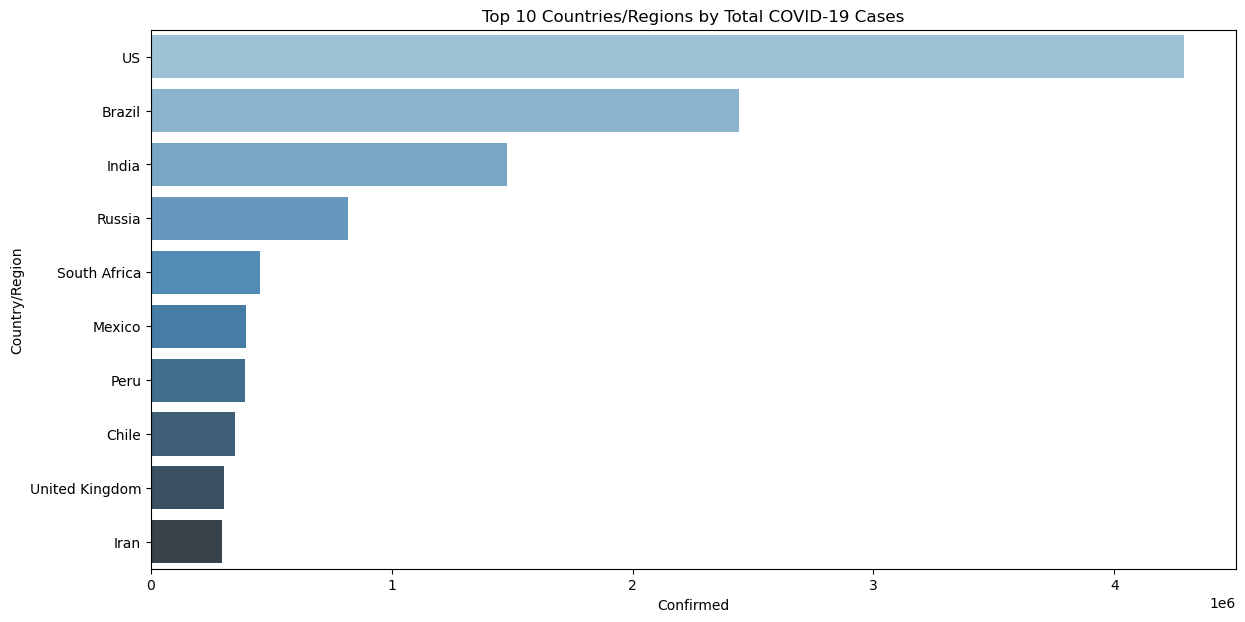

C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_13896\850035032.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='Reds_d')


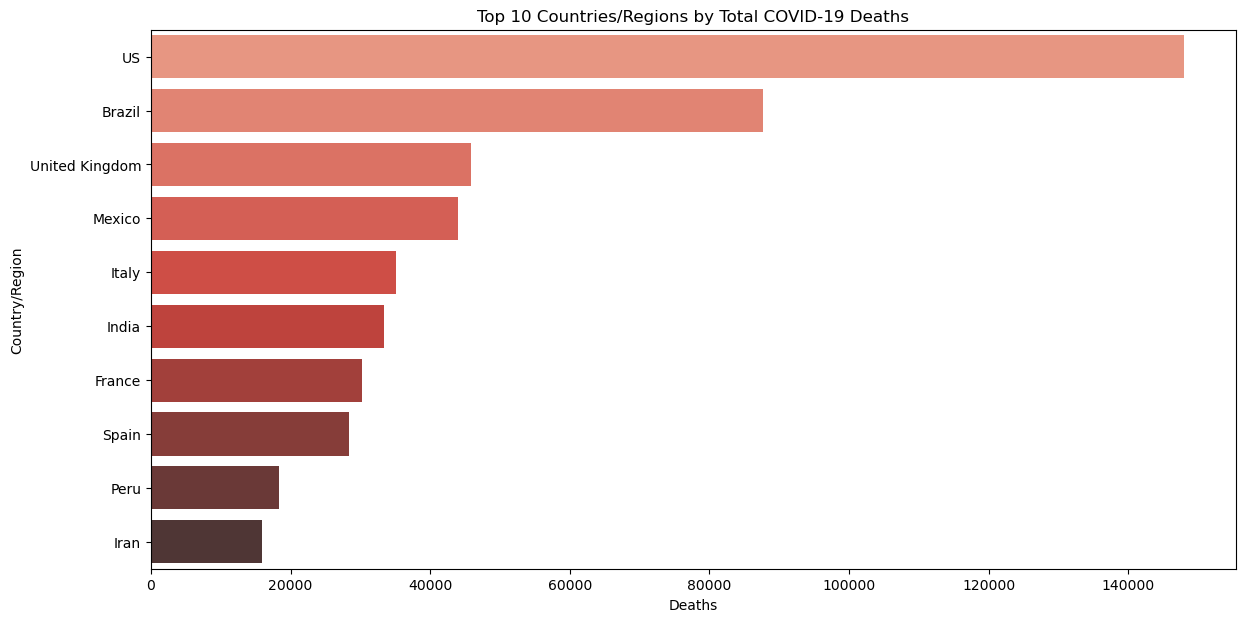

In [65]:
# Analyzing COVID-19 trends, such as case and mortality rates over time for all Dataframes

import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar chart to compare total cases across countries
plt.figure(figsize=(14, 7))
top_countries = df_country_wise_latest.nlargest(10, 'Confirmed')  # Top 10 countries by total cases
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='Blues_d')
plt.title('Top 10 Countries/Regions by Total COVID-19 Cases')
plt.xlabel('Confirmed')
plt.ylabel('Country/Region')
plt.show()

# Creating a bar chart to compare total deaths across countries
plt.figure(figsize=(14, 7))
top_deaths = df_country_wise_latest.nlargest(10, 'Deaths')  # Top 10 countries by total deaths
sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='Reds_d')
plt.title('Top 10 Countries/Regions by Total COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.show()

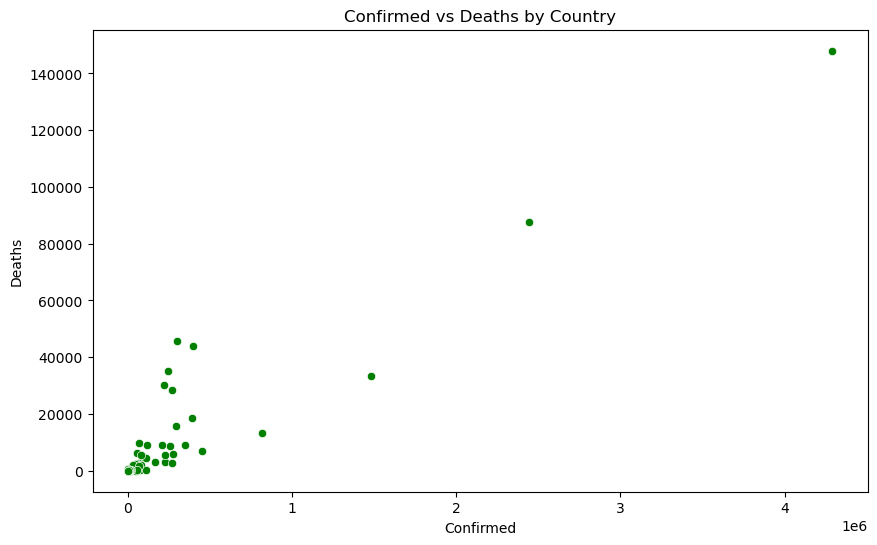

In [67]:
# Scatter plot for Confirmed cases vs total deaths

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df_country_wise_latest, color='green')
plt.title('Confirmed vs Deaths by Country')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.show()

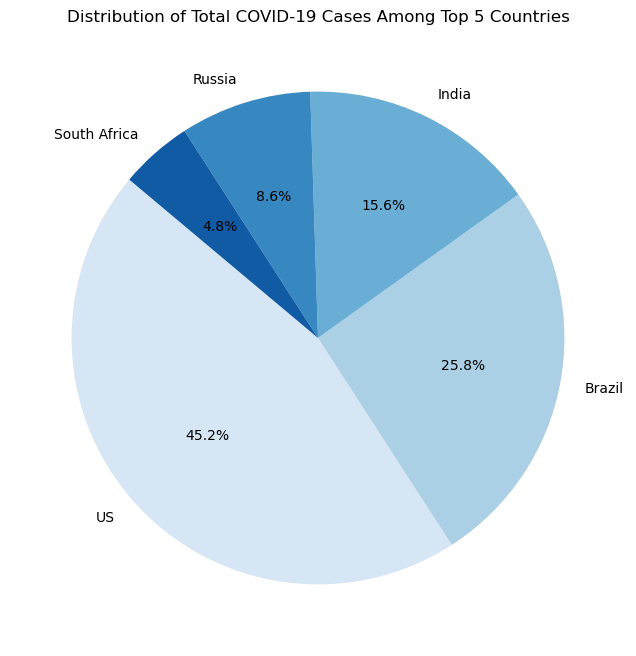

In [69]:
# Pie chart for the distribution of total cases among top countries

top_countries = df_country_wise_latest.nlargest(5, 'Confirmed')  # Top 5 countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries['Confirmed'], labels=top_countries['Country/Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues', len(top_countries)))
plt.title('Distribution of Total COVID-19 Cases Among Top 5 Countries')
plt.show()

C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_13896\1329478985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=top_mortality_ratio, palette='Reds_d')


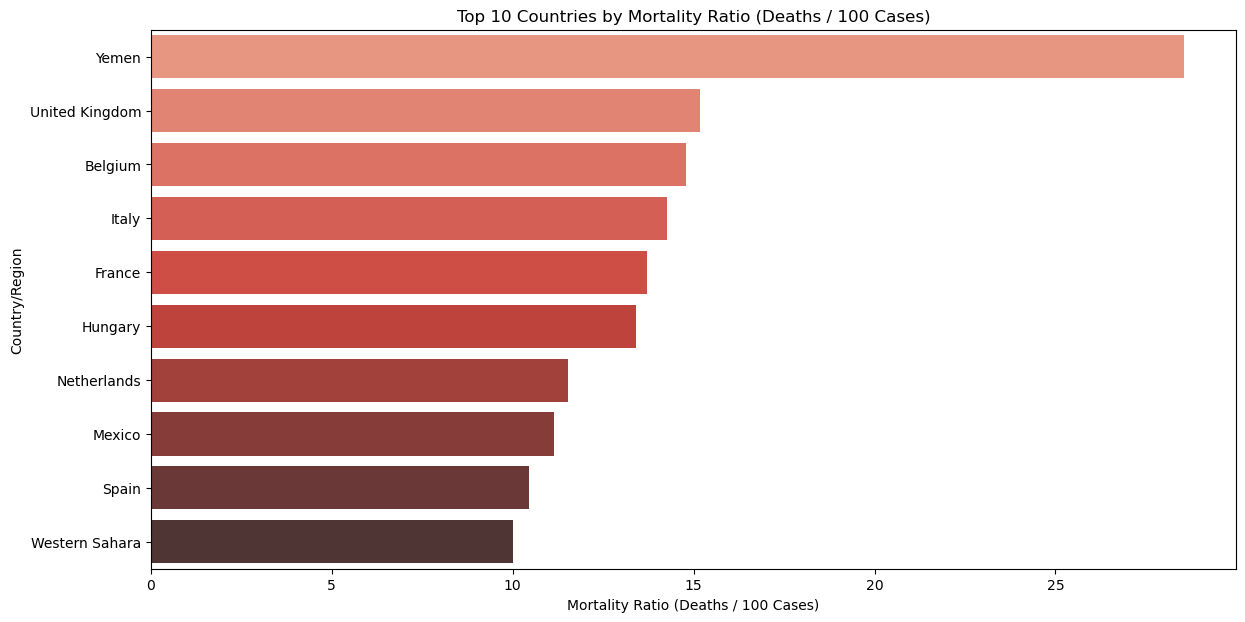

In [77]:
# Assuming you have a column like 'deaths_per_100_cases' in your dataframe

plt.figure(figsize=(14, 7))
top_mortality_ratio = df_country_wise_latest.nlargest(10, 'Deaths / 100 Cases')  # Top 10 by mortality ratio
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=top_mortality_ratio, palette='Reds_d')
plt.title('Top 10 Countries by Mortality Ratio (Deaths / 100 Cases)')
plt.xlabel('Mortality Ratio (Deaths / 100 Cases)')
plt.ylabel('Country/Region')
plt.show()

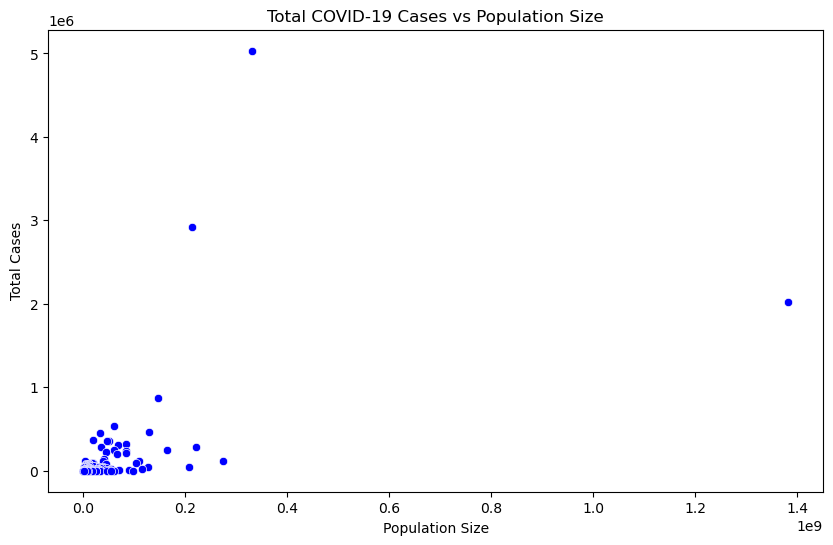

In [81]:
# To identify demographic and environmental factors that could influence the spread and severity of COVID-19 cases, I will make use of the df_worldometer_data DataFrame

# Scatter plot of Total cases vs Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='TotalCases', data=df_worldometer_data, color='blue')
plt.title('Total COVID-19 Cases vs Population Size')
plt.xlabel('Population Size')
plt.ylabel('Total Cases')
plt.show()

In [83]:
# Insight: There is a strong correlation between Population Size and the Number of Cases

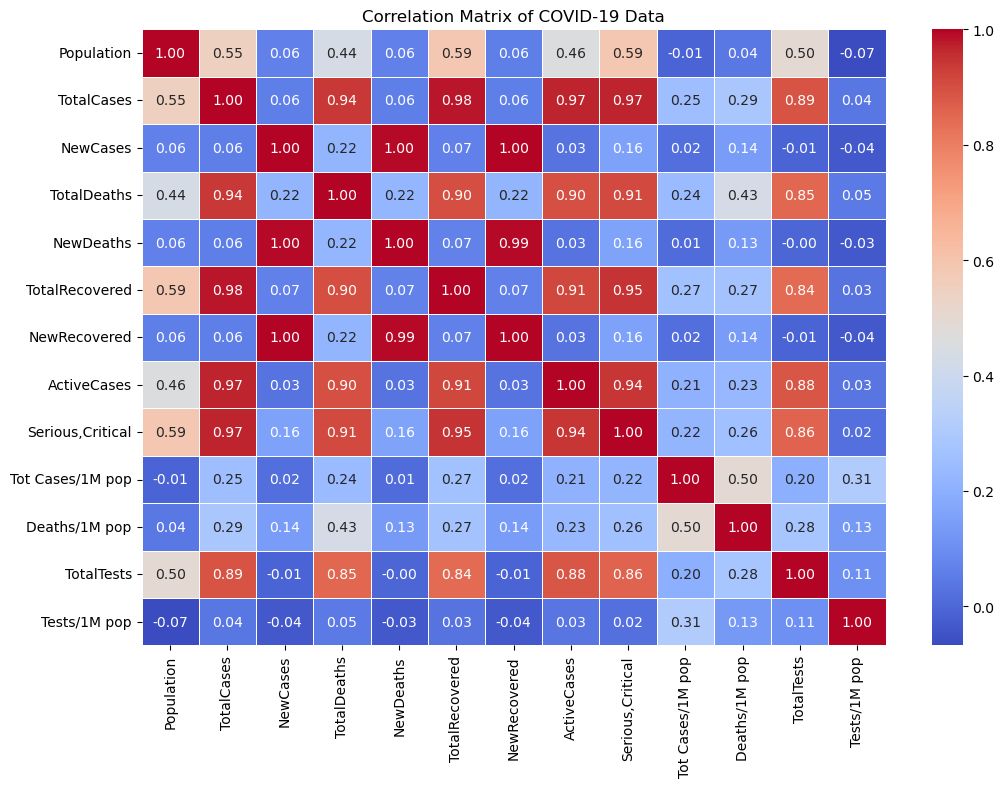

In [89]:
# Drop non-numeric columns
df_numeric = df_worldometer_data.select_dtypes(include=['number'])

# Now compute the correlation matrix on the numeric-only dataframe
corr_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()

In [91]:
# Applying predictive models such as Time-Series Models and Classification Models to my COVID-19 data.

C:\Users\Welcome Sir\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Welcome Sir\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Welcome Sir\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Welcome Sir\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Welcome Sir\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Li

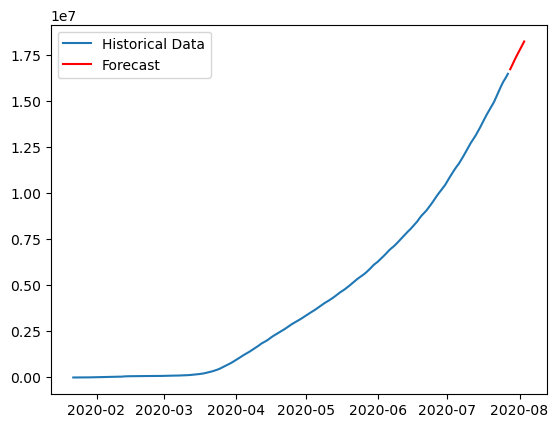

In [93]:
# For the Time-Series Models, using the df_day_wise DataFrame to see if we can expect more confirmed cases in the next seven days

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_day_wise['Date'] = pd.to_datetime(df_day_wise['Date'])
df_day_wise.set_index('Date', inplace=True)

# Fitting the ARIMA model
model = ARIMA(df_day_wise['Confirmed'], order=(5,1,0))
model_fit = model.fit()

# Predicting the next 7 days
forecast = model_fit.forecast(steps=7)

# Plotting the results
plt.plot(df_day_wise.index, df_day_wise['Confirmed'], label='Historical Data')
plt.plot(pd.date_range(df_day_wise.index[-1], periods=8, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

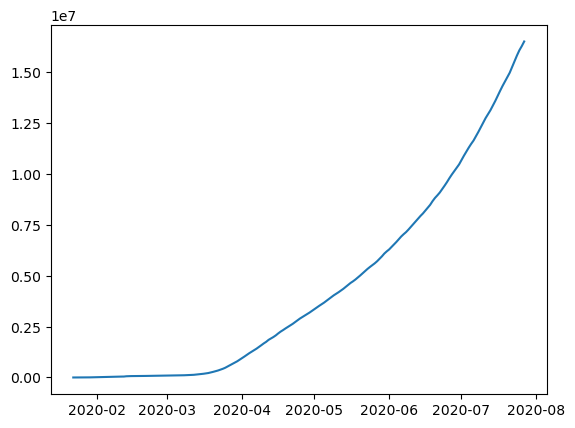

In [97]:
#Time-Series Predictions: Visualizing the predicted future cases vs. actual data to assess model accuracy.

plt.plot(df_day_wise.index, df_day_wise['Confirmed'], label='Actual')
plt.plot(pd.date_range(df_day_wise.index[-1], periods=7, freq='D')[1:], forecast, label='Predicted', color='red')
plt.title('COVID-19 Forecast')
plt.legend()
plt.show()

In [117]:
df_day_wisee = pd.read_csv("day_wise.csv")
df_day_wisee

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [121]:
# Ensuring that my Data is Split into Training and Testing Sets:
train_size = int(len(df_day_wisee) * 0.8)  # 80% training, 20% testing
train, test = df_day_wisee[0:train_size], df_day_wisee[train_size:]

# Define your target variable (e.g., 'cases') and the date variable (e.g., 'date')
X_train, y_train = train[['Confirmed', 'Deaths']], train['Date']
X_test, y_test = test[['Confirmed', 'Deaths']], test['Date']

In [143]:
# Ensuring that my Data is Split into Training and Testing Sets:
train_size = int(len(df_day_wise) * 0.8)  # 80% training, 20% testing
train, test = df_day_wise[0:train_size], df_day_wise[train_size:]

# Define your target variable (e.g., 'cases') and the date variable (e.g., 'date')
X_train, y_train = train[['Confirmed', 'Deaths']], train['Recovered']
X_test, y_test = test[['Confirmed', 'Deaths']], test['Recovered']

In [153]:
df_day_wise['Severe_Outbreak'] = df_day_wise['Confirmed'].apply(lambda x: 1 if x > 100000 else 0)  # Binary classification (Severe vs Not Severe)

In [157]:
# Applying the predictive Classification Models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Example dataframe with features and target (Severe_Outbreak)
X = df_day_wise[['Confirmed', 'Deaths', 'New cases', 'Recovered / 100 Cases']]  # Features
y = df_day_wise['Severe_Outbreak']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        29

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[ 9  0]
 [ 0 29]]


In [159]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning hyperparameters of a RandomForestClassifier
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 50}


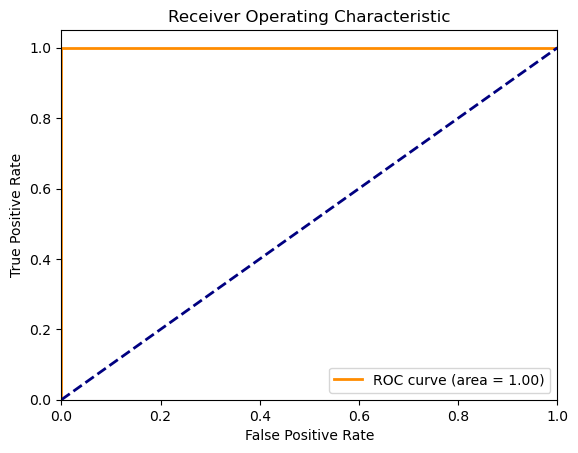

In [161]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [163]:
# To assess my classification model performance using metrics like accuracy, precision, recall, and F1-score,

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [165]:
y_pred = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)  # For binary classification

In [167]:
# Calculating Basic Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro', 'micro', or 'weighted' for multiclass
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='binary')  # Adjust `average` for multiclass
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust `average` for multiclass
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [169]:
# CLASSIFICATION REPORT
# The classification report provides all these metrics for each class in one table:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        29

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [171]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 9  0]
 [ 0 29]]


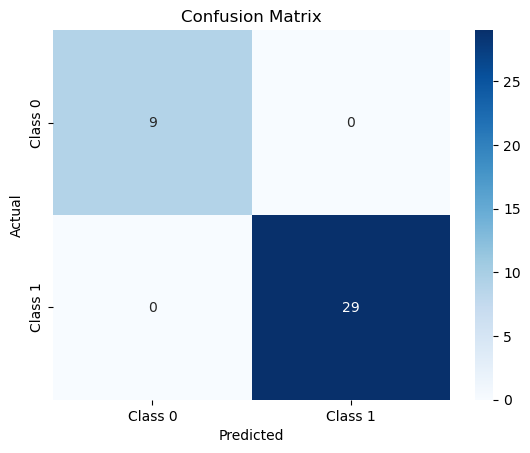

In [173]:
#To visualize it:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()